<a href="https://colab.research.google.com/github/SatwadhiDas/nnfl-dropout/blob/master/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import decimal
import os
import csv

In [0]:
def findValueN(prob):
    # pn = 256 for 2 first hidden layers
    # pn = 512 for last layer
        # n values are the number of hidden units at each layer
    n1 = int(256.0/prob)
    n2 = int(256.0/prob)
    n3 = int(512.0/prob)
    n = [n1,n2,n3,prob]
        # return number o
    float(n[3])
    return n

In [0]:
def addPValue(prob):
        # layers all have 2048 hidden units as described in the research paper
    n1 = 2048
    n2 = 2048
    n3 = 2048
    n = [n1,n2,n3,prob]
    float(n[3])
    return n

In [0]:
def runDropout(*layer):
        # Sequential model and the layers that describe the model
    model = Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape, activation="relu"))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(Dense(layer[0], activation='relu'))
    model.add(Dropout(layer[3]))
    model.add(Dense(layer[1], activation='relu'))
    model.add(Dropout(layer[3]))
    model.add(Dense(layer[2], activation='relu'))
    model.add(Dropout(layer[3]))
    model.add(Dense(10, activation='softmax'))


        # Configure model before training
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    batch_size = 128
    epochs = 10

        # Train the model for a fixed number of epochs
    history_dropout = model.fit_generator(training_set, 
                         steps_per_epoch=60000//64, 
                         validation_data= test_set, 
                         validation_steps=10000//64, 
                         epochs=10)
    
    y_pred=model.predict_classes(x_test);
    y_test_res = y_test.reshape(1,y_test.shape[0],1);
    y_pred_res = y_pred.reshape(1,y_test.shape[0],1);
    print(tf.image.psnr(y_test_res,y_pred_res,max_val=1.0),'PSNR VALUE')

        # Training accuracy
    accuracy = history_dropout.history['accuracy']
    train_err = 100.0 - 100.0*(accuracy[-1])

        # Test Accuracy
            # Validation accuracy possibly not same as Test accuracy
    val_acc = history_dropout.history['val_accuracy']
    test_err = 100.0 - 100.0*(val_acc[-1])
    # *** Calculate error bars HERE ***
    finalError = [test_err, train_err, layer[3]]
    return finalError
    # END OF RUN DROPOUT #
    

In [0]:
def floatRange(start, stop, step):
  while start <= stop:
    yield float(start)
    start += decimal.Decimal(step)

In [0]:
def runForAllP():
    # lists to store ploting values locally
        # figure a error
    a_test_error = []
    a_train_error = []
        # figure b error
    b_test_error = []
    b_train_error = []
        # returns the list of p values from 0.1-1.0, into list
    pValues = [0.1,0.2]
    pValues1 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

    print(pValues)
    # run dropout on all values of p for both figures
    for i in pValues:
        varyLayer = findValueN(i)
        constLayer = addPValue(i)
            # Store error values for figure a
        errorFigA = runDropout(*constLayer)
        a_test_error.append(errorFigA[0])
        a_train_error.append(errorFigA[1])
        print("a_train_error")
        print(a_train_error)
        print("\n")
        print("a_test_error")
        print(a_test_error)
        print("\n")
    for i in pValues:
        varyLayer = findValueN(i)
        constLayer = addPValue(i)
        errorFigB = runDropout(*varyLayer)
        # Store error values for figure b
        b_test_error.append(errorFigB[0])
        b_train_error.append(errorFigB[1])
        print("b_train_error")
        print(b_train_error)
        print("\n")
        print("b_test_error")
        print(b_test_error)
        print("\n")


60000 train samples
10000 test samples
[0.1, 0.2]
60000 train samples
10000 test samples
Epoch 1/10
937/937 [==============================] - 1311s 1s/step - loss: 0.2547 - accuracy: 0.9213 - val_loss: 0.1405 - val_accuracy: 0.9627
Epoch 2/10
937/937 [==============================] - 1296s 1s/step - loss: 0.1193 - accuracy: 0.9656 - val_loss: 0.1273 - val_accuracy: 0.9731
Epoch 3/10
937/937 [==============================] - 1296s 1s/step - loss: 0.0958 - accuracy: 0.9729 - val_loss: 0.1088 - val_accuracy: 0.9750
Epoch 4/10
937/937 [==============================] - 1297s 1s/step - loss: 0.0852 - accuracy: 0.9759 - val_loss: 0.0473 - val_accuracy: 0.9802
Epoch 5/10
937/937 [==============================] - 1297s 1s/step - loss: 0.0748 - accuracy: 0.9778 - val_loss: 0.0973 - val_accuracy: 0.9795
Epoch 6/10
937/937 [==============================] - 1296s 1s/step - loss: 0.0690 - accuracy: 0.9803 - val_loss: 0.0247 - val_accuracy: 0.9772
Epoch 7/10
937/937 [===========================

ValueError: ignored

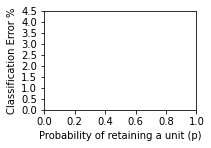

In [27]:
(x_train, y_train), (x_test, y_test) =mnist.load_data()

# Reshaping the array to 4-dims so that it can work with the API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Set values to float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

train_gen = ImageDataGenerator(rotation_range=8, 
                               width_shift_range=0.08, 
                               shear_range=0.3, 
                               height_shift_range=0.08, 
                               zoom_range=0.08 )
test_gen = ImageDataGenerator()

training_set= train_gen.flow(x_train, y_train, batch_size=64)
test_set= train_gen.flow(x_test, y_test, batch_size=64)

# runs both archetectures for all values of p (from 0.1-1.0, inclusive)
# Currently takes too long to run, but I'm confident that the output will come
    # close to the results in the figure
runForAllP()